In [1]:
import numpy as np;
import xarray as xr;
import matplotlib.pyplot as plt;
import h5_reader_xr as reader;
import gysela_utilities as utils;

# Styling.
plt.style.use("bmh");

In [2]:
time_step = reader.fetch_data_from_h5("C:\\Workspace\\NSCC\\local copies\\h5 samples\\q1.5_trunc\\Phi2D_d00000.h5")["deltat"].values;
data_arrays = reader.compile_data_from_directory("Phirth_n0", "C:\\Workspace\\NSCC\\local copies\\h5 samples\\q1.5_trunc");

c:\Workspace\NSCC\GYSELA_utils\Post-Processing\Scripts\h5_reader_xr.py:18: UserWarning: The 'phony_dims' kwarg now defaults to 'access'. Previously 'phony_dims=None' would raise an error. For full netcdf equivalence please use phony_dims='sort'.
  dataset = xr.open_dataset(filepath, engine = "h5netcdf");
c:\Workspace\NSCC\GYSELA_utils\Post-Processing\Scripts\h5_reader_xr.py:18: UserWarning: The 'phony_dims' kwarg now defaults to 'access'. Previously 'phony_dims=None' would raise an error. For full netcdf equivalence please use phony_dims='sort'.
  dataset = xr.open_dataset(filepath, engine = "h5netcdf");
c:\Workspace\NSCC\GYSELA_utils\Post-Processing\Scripts\h5_reader_xr.py:18: UserWarning: The 'phony_dims' kwarg now defaults to 'access'. Previously 'phony_dims=None' would raise an error. For full netcdf equivalence please use phony_dims='sort'.
  dataset = xr.open_dataset(filepath, engine = "h5netcdf");
c:\Workspace\NSCC\GYSELA_utils\Post-Processing\Scripts\h5_reader_xr.py:18: UserWar

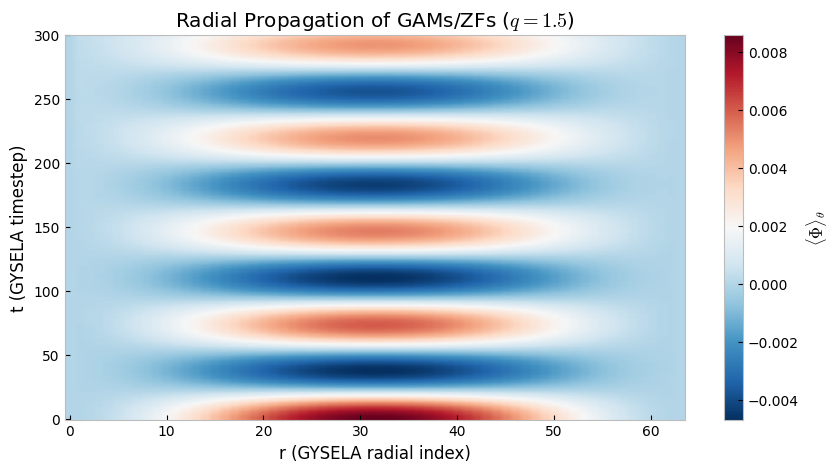

In [3]:
def plot_hovmoller(hovmoller_matrix):
	
	plt.figure(figsize=(10, 5));
	plt.imshow(hovmoller_matrix, aspect = "auto", cmap = "RdBu_r", origin = "lower");
	plt.colorbar(label= r"$\langle \Phi \rangle_\theta$");
	plt.ylabel("t (GYSELA timestep)");
	plt.xlabel("r (GYSELA radial index)");
	plt.title(r"Radial Propagation of GAMs/ZFs ($q = 1.5$)");
	plt.grid(False);
	plt.show();

hovmoller_matrix = utils.generate_poloidally_averaged_time_series(data_arrays);
plot_hovmoller(hovmoller_matrix);

#### Because the GAM is radially dispersive (due to dependencies on local temperature $T_i, T_e$ and safety factor $q$), we expect variations in phase for the local GAM as we move along the radial index.

#### If, however, $T$ and $q$ exhibit no radial gradients, the GAM frequency is uniform across $r$ and therefore corresponds to a coherent, global oscillation (no radial phase-mixing). This likely corresponds to a linear or a weakly non-linear regime. In our case, I suspect this behaviour comes about because we have not simulated turbulence - the GAM is pure/imposed!